<aside>
💡 Question-1

You are given a binary tree. The binary tree is represented using the TreeNode class. Each TreeNode has an integer value and left and right children, represented using the TreeNode class itself. Convert this binary tree into a binary search tree.

Input:

        10

       /   \

     2      7

   /   \

 8      4

Output:

        8

      /   \

    4     10

  /   \

2      7

</aside>

In [1]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def convert_to_bst(root):
    # Step 1: Perform an in-order traversal to extract node values
    nodes = []
    inorder_traversal(root, nodes)

    # Step 2: Sort the extracted node values
    sorted_nodes = sorted(nodes)

    # Step 3: Create a new binary search tree
    new_root = build_bst(sorted_nodes)

    return new_root

def inorder_traversal(node, nodes):
    if node is not None:
        inorder_traversal(node.left, nodes)
        nodes.append(node.val)
        inorder_traversal(node.right, nodes)

def build_bst(nodes):
    if not nodes:
        return None

    mid = len(nodes) // 2
    root = TreeNode(nodes[mid])
    root.left = build_bst(nodes[:mid])
    root.right = build_bst(nodes[mid+1:])

    return root

# Test the code
root = TreeNode(10)
root.left = TreeNode(2)
root.right = TreeNode(7)
root.left.left = TreeNode(8)
root.left.right = TreeNode(4)

new_root = convert_to_bst(root)

# Validate the converted binary search tree
# Expected output:
#       8
#     /   \
#    4     10
#   / \
#  2   7
def print_tree_inorder(node):
    if node is not None:
        print_tree_inorder(node.left)
        print(node.val)
        print_tree_inorder(node.right)

print_tree_inorder(new_root)

2
4
7
8
10


<aside>
💡 Question-2:

Given a Binary Search Tree with all unique values and two keys. Find the distance between two nodes in BST. The given keys always exist in BST.

Example:

Consider the following BST:

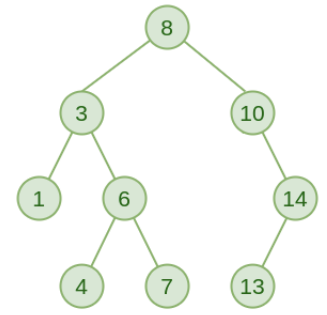

**Input-1:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 6

node-2 = 14

**Output-1:**

The distance between the two keys = 4

**Input-2:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 3

node-2 = 4

**Output-2:**

The distance between the two keys = 2

</aside>

In [2]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def construct_bst(values):
    root = None
    for val in values:
        root = insert_node(root, val)
    return root

def insert_node(root, value):
    if root is None:
        return TreeNode(value)
    
    if value < root.val:
        root.left = insert_node(root.left, value)
    elif value > root.val:
        root.right = insert_node(root.right, value)
    
    return root

def find_distance(root, node1, node2):
    # Find the Lowest Common Ancestor (LCA)
    lca = find_lca(root, node1, node2)

    # Calculate the distances from LCA to node1 and node2
    dist1 = find_distance_from_node(lca, node1)
    dist2 = find_distance_from_node(lca, node2)

    # Add the distances together to get the total distance
    distance = dist1 + dist2

    return distance

def find_lca(root, node1, node2):
    if root is None:
        return None
    
    if node1 < root.val and node2 < root.val:
        return find_lca(root.left, node1, node2)
    
    if node1 > root.val and node2 > root.val:
        return find_lca(root.right, node1, node2)
    
    return root

def find_distance_from_node(node, target):
    if node.val == target:
        return 0

    if target < node.val:
        return 1 + find_distance_from_node(node.left, target)

    return 1 + find_distance_from_node(node.right, target)

# Test the code
values = [8, 3, 1, 6, 4, 7, 10, 14, 13]
root = construct_bst(values)

node1 = 6
node2 = 14
distance = find_distance(root, node1, node2)
print("The distance between the two keys =", distance)
# Output: The distance between the two keys = 4

node1 = 3
node2 = 4
distance = find_distance(root, node1, node2)
print("The distance between the two keys =", distance)
# Output: The distance between the two keys = 2

The distance between the two keys = 4
The distance between the two keys = 2


💡 Question-3:

Write a program to convert a binary tree to a doubly linked list.

Input:

        10

       /   \

     5     20

           /   \

        30     35

Output:

5 10 30 20 35

In [3]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

class DoublyLinkedListNode:
    def __init__(self, value):
        self.val = value
        self.prev = None
        self.next = None

def convert_to_doubly_linked_list(root):
    if root is None:
        return None

    # Convert the left subtree recursively
    left_head = convert_to_doubly_linked_list(root.left)

    # Convert the right subtree recursively
    right_head = convert_to_doubly_linked_list(root.right)

    # Create a new doubly linked list node for the current node
    new_node = DoublyLinkedListNode(root.val)

    # Merge the left subtree list with the new node
    head = merge_lists(left_head, new_node)

    # Merge the right subtree list with the new node and left subtree list
    head = merge_lists(head, right_head)

    return head

def merge_lists(list1, list2):
    if list1 is None:
        return list2
    if list2 is None:
        return list1

    # Find the tail of the first list
    tail1 = list1
    while tail1.next is not None:
        tail1 = tail1.next

    # Connect the tail of the first list with the second list
    tail1.next = list2
    list2.prev = tail1

    return list1

# Test the code
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(20)
root.right.left = TreeNode(30)
root.right.right = TreeNode(35)

head = convert_to_doubly_linked_list(root)

# Print the doubly linked list in forward direction
current = head
while current is not None:
    print(current.val, end=" ")
    current = current.next

# Output: 5 10 30 20 35

5 10 30 20 35 

💡 Question-4:

Write a program to connect nodes at the same level.

Input:

        1

      /   \

    2      3

  /   \   /   \

4     5 6    7

Output:

1 → -1

2 → 3

3 → -1

4 → 5

5 → 6

6 → 7

7 → -1

In [4]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None
        self.next = None

def connect_nodes_at_same_level(root):
    if root is None:
        return

    # Start with the root node
    queue = [root]

    while queue:
        # Get the size of the current level
        level_size = len(queue)

        # Process each node in the current level
        for i in range(level_size):
            # Get the current node
            current = queue.pop(0)

            # Connect the current node to the next node on the same level
            if i < level_size - 1:
                current.next = queue[0]

            # Add the left and right children to the queue
            if current.left:
                queue.append(current.left)
            if current.right:
                queue.append(current.right)

# Test the code
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

connect_nodes_at_same_level(root)

# Print the connections
current = root
while current:
    temp = current
    while temp:
        if temp.next:
            print(temp.val, "→", temp.next.val)
        else:
            print(temp.val, "→ -1")
        temp = temp.next
    current = current.left


1 → -1
2 → 3
3 → -1
4 → 5
5 → 6
6 → 7
7 → -1
